<a href="https://colab.research.google.com/github/MarcScript/COVID-19-Paraguay-Cases-Prediction-with-Neural-LSTM-Network-/blob/main/Proyecto_Final_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final de Inteligencia Artificial
---
Este proyecto tiene como fin desarrollar una red recurrente tipo LSTM capaz de estimar correctamente el número total de casos de COVID-19 en Paraguay.

Estudiantes:

*   Marcos Ibañez - maibanez@fiuna.edu.py
*   Hugo Melgarejo - hmelgarejo@fiuna.edu.py

Docentes:

*   Profesor Encargado - Dr. Diego Stalder - stalderdiego@gmail.com 
*   Profesor Auxiliar - Ing. Enrique Paiva - epaiva@fiuna.edu.py

In [15]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


# Inicio del preprocesamiento de datos

## Importamos la base de datos de la universidad Johns Hopckins
La base de datos inicia el recuento de casos por país el 22 de enero del año 2020 y se va actualizando hasta la fecha, actualmente se disponen datos hasta el 14/05/2021.

In [16]:
#Importamos la base de datos de la universidad Johns Hopkins
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
ds = pd.read_csv(url)
ds.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,117739,117879,118004,118116,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12286,12328,12363,12409,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22717,22885,23010,23108,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030


In [34]:
#Extraemos los parámetros que nos interesan
dataset = ds.loc[ds['Country/Region']=="Paraguay"] #Elegimos Paraguay entre los países debido a que es nuestro objeto de estudio
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21
207,NaN,Paraguay,-23.4425,-58.4438,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,222663,224736,227116,229595,232142,233745,235292,237542,240141,242161,244528,244528,248364,250165,252443,255046,257706,260382,263134,265296,267082,269353,271814,274170,276865,279077,281023,282543,284453,286667,288974,291540,294233,296306,297789,299684,302061,304889,307457,309638


In [35]:
#Transponemos los datos para que quede una serie temporal
serie_temporal = dataset.iloc[:, 4:]
serie_temporal = serie_temporal.T
serie_temporal.rename(columns={207: 'Casos Totales'}, index={}, inplace= True)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(serie_temporal)
serie_temporal.head()
#X = serie_temporal.values


,Casos Totales
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


## Gráfico de situación actual.

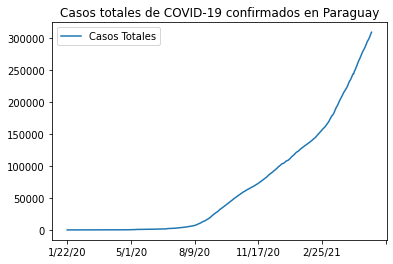

In [26]:

serie_temporal.plot()
plt.title("Casos totales de COVID-19 confirmados en Paraguay")
pyplot.show()

## Separamos los datos en conjunto de entrenamiento y test

In [20]:

train_size = int(len(X) * 0.95)
test_size = len(X) - train_size
train, test = X[0:train_size,:], X[train_size:len(X),:]
print(len(train), len(test))


455 24


In [21]:

# Creamos una funcion para crear un dataset apartir de la serie temporal
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [22]:
# Realizamos reshape como X=t y Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Creamos y entrenamos la red neuronal recurrente LSTM

In [23]:
# Creamos la red neuronal LSTM
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
453/453 - 2s - loss: 0.0266
Epoch 2/100
453/453 - 0s - loss: 0.0019
Epoch 3/100
453/453 - 0s - loss: 3.7584e-05
Epoch 4/100
453/453 - 0s - loss: 3.0314e-05
Epoch 5/100
453/453 - 0s - loss: 2.6485e-05
Epoch 6/100
453/453 - 0s - loss: 2.2349e-05
Epoch 7/100
453/453 - 0s - loss: 1.6115e-05
Epoch 8/100
453/453 - 1s - loss: 1.2504e-05
Epoch 9/100
453/453 - 0s - loss: 8.8796e-06
Epoch 10/100
453/453 - 0s - loss: 5.9004e-06
Epoch 11/100
453/453 - 0s - loss: 3.9923e-06
Epoch 12/100
453/453 - 0s - loss: 3.4188e-06
Epoch 13/100
453/453 - 0s - loss: 3.3614e-06
Epoch 14/100
453/453 - 0s - loss: 3.3886e-06
Epoch 15/100
453/453 - 0s - loss: 4.6695e-06
Epoch 16/100
453/453 - 0s - loss: 4.9676e-06
Epoch 17/100
453/453 - 0s - loss: 4.2216e-06
Epoch 18/100
453/453 - 0s - loss: 4.8586e-06
Epoch 19/100
453/453 - 0s - loss: 8.8621e-06
Epoch 20/100
453/453 - 0s - loss: 7.9658e-06
Epoch 21/100
453/453 - 0s - loss: 5.7248e-06
Epoch 22/100
453/453 - 0s - loss: 6.6476e-06
Epoch 23/100
453/453 - 0s -

# Revisamos las métricas del modelo para corroborar su correcto desempeño

In [24]:
import math
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
aux3 = np.concatenate(( trainPredict[:,0], testPredict[:,0]), axis=0)

Train Score: 626.38 RMSE
Test Score: 1986.22 RMSE


# Visualizamos la predicción realizada por el modelo

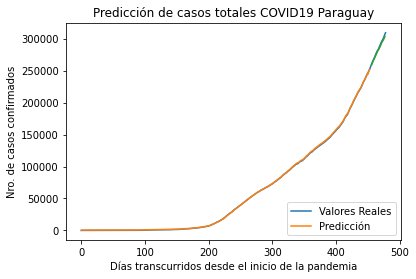

In [36]:
import matplotlib.pyplot as plt
# shift train predictions for plotting
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(X)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Valores Reales', 'Predicción'], loc ="lower right")
plt.title("Predicción de casos totales COVID19 Paraguay")
plt.xlabel('Días transcurridos desde el inicio de la pandemia')
plt.ylabel('Nro. de casos confirmados')
plt.show()

# Bibliografía


*  Predicción de series temporales utilizando redes LSTM [machinelearningmastery.com](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)
*  Repositorio COVID-19 de la universidad John Hopckins
[CSSEGISandData](https://github.com/CSSEGISandData)

